In [1]:
# importing basic packages
import numpy as np 
import pandas as pd 
import datetime 
# Viz
import matplotlib.pyplot as plt 
import seaborn as sns 
import mlxtend
from mlxtend.plotting import heatmap
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor

# settings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the datasets
features = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/features.csv')
train    = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/stores.csv')
stores   = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/train.csv')

In [3]:
df_names=['features','stores','train']
df_list=[features,stores,train]
for i in range(3):
    print('--'*25)
    print(f'Dataframe {df_names[i]} has {df_list[i].shape[0]} rows and {df_list[i].shape[1]} columns.')
    print('--'*25)
    display(df_list[i].head(5))

--------------------------------------------------
Dataframe features has 8190 rows and 12 columns.
--------------------------------------------------


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


--------------------------------------------------
Dataframe stores has 421570 rows and 5 columns.
--------------------------------------------------


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


--------------------------------------------------
Dataframe train has 45 rows and 3 columns.
--------------------------------------------------


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Merging three dataframes "features", "Stores", "Train".

In [4]:
df1= train.merge(stores, how='left').merge(features, how='left')
df1

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,A,151315,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,B,118221,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,B,118221,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,B,118221,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


### Splitting the date column into YEAR, MONTH, WEEK, DAY

In [5]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = pd.to_datetime(df1['Date']).dt.year
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
df1['Week'] = pd.to_datetime(df1['Date']).dt.week
df1['Day'] = pd.to_datetime(df1['Date']).dt.day
df1.replace({'A': 1, 'B': 2,'C':3},inplace=True)
df1['IsHoliday'] = df1['IsHoliday'].apply(lambda x: 1 if x == True else 0)
df1.head(5)

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
0,1,1,151315,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,151315,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,6,12
2,1,1,151315,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,7,19
3,1,1,151315,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,8,26
4,1,1,151315,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,9,5


In [6]:
df1.describe()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,1.589912,136727.915739,44.260317,15981.258123,0.070358,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,2010.968591,6.449510,25.826762,15.673131
std,12.785297,0.666337,60980.583328,30.492054,22711.183519,0.255750,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.796876,3.243217,14.151887,8.753549
min,1.000000,1.000000,34875.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,2010.000000,1.000000,1.000000,1.000000
25%,11.000000,1.000000,93638.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,2010.000000,4.000000,14.000000,8.000000
50%,22.000000,1.000000,140167.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,2011.000000,6.000000,26.000000,16.000000
75%,33.000000,2.000000,202505.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,2012.000000,9.000000,38.000000,23.000000
max,45.000000,3.000000,219622.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,12.000000,52.000000,31.000000


#### Calculating the missing values in the dataframe

In [7]:
print('Percentage of the missing values.')
(100*df1.isna().sum()/df1.shape[0]).sort_values()

Percentage of the missing values.


Store            0.000000
Month            0.000000
Year             0.000000
Unemployment     0.000000
CPI              0.000000
Week             0.000000
Fuel_Price       0.000000
Day              0.000000
IsHoliday        0.000000
Weekly_Sales     0.000000
Date             0.000000
Dept             0.000000
Size             0.000000
Type             0.000000
Temperature      0.000000
MarkDown5       64.079038
MarkDown1       64.257181
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown2       73.611025
dtype: float64

#### Replacing the null values in markdown columns with 0

In [8]:
df1.iloc[:,9:14]=df1.iloc[:,9:14].fillna(0)
print('Percentage of the missing values.')
(100*df1.isna().sum()/df1.shape[0]).sort_values()

Percentage of the missing values.


Store           0.0
Month           0.0
Year            0.0
Unemployment    0.0
CPI             0.0
MarkDown5       0.0
MarkDown4       0.0
MarkDown3       0.0
MarkDown2       0.0
MarkDown1       0.0
Fuel_Price      0.0
Temperature     0.0
IsHoliday       0.0
Weekly_Sales    0.0
Date            0.0
Dept            0.0
Size            0.0
Type            0.0
Week            0.0
Day             0.0
dtype: float64

#### Creating a markdown variable in the dataframe which is equal to 1 if any of the markdown is equal to 1, otherwise 0

In [9]:
df1['markdown'] = df1.iloc[:,9:14].sum(axis=1)
df1['markdown'] = df1['markdown'].apply(lambda x:0 if x==0 else 1)
df1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
df1

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,markdown
0,1,1,151315,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,2010,2,5,5,0
1,1,1,151315,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,2010,2,6,12,0
2,1,1,151315,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,2010,2,7,19,0
3,1,1,151315,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,2010,2,8,26,0
4,1,1,151315,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,2010,3,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,98,2012-09-28,508.37,0,64.88,3.997,192.013558,8.684,2012,9,39,28,1
421566,45,2,118221,98,2012-10-05,628.10,0,64.89,3.985,192.170412,8.667,2012,10,40,5,1
421567,45,2,118221,98,2012-10-12,1061.02,0,54.47,4.000,192.327265,8.667,2012,10,41,12,1
421568,45,2,118221,98,2012-10-19,760.01,0,56.47,3.969,192.330854,8.667,2012,10,42,19,1


### EXPLORATORY DATA ANALYSIS. 

#### Moving the target variable 'Weekly_Sales' to the end of the dataframe. It will be easy to read the corr matrix 

In [10]:
cols = list(df1.columns)
cols.pop(cols.index('Weekly_Sales')) 
df1 = df1[cols+['Weekly_Sales']]
df1.head(5)

,Store,Type,Size,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,markdown,Weekly_Sales
0,1,1,151315,1,2010-02-05,0,42.31,2.572,211.096358,8.106,2010,2,5,5,0,24924.50
1,1,1,151315,1,2010-02-12,1,38.51,2.548,211.242170,8.106,2010,2,6,12,0,46039.49
2,1,1,151315,1,2010-02-19,0,39.93,2.514,211.289143,8.106,2010,2,7,19,0,41595.55
3,1,1,151315,1,2010-02-26,0,46.63,2.561,211.319643,8.106,2010,2,8,26,0,19403.54
4,1,1,151315,1,2010-03-05,0,46.50,2.625,211.350143,8.106,2010,3,9,5,0,21827.90


#### Correlation Matrix

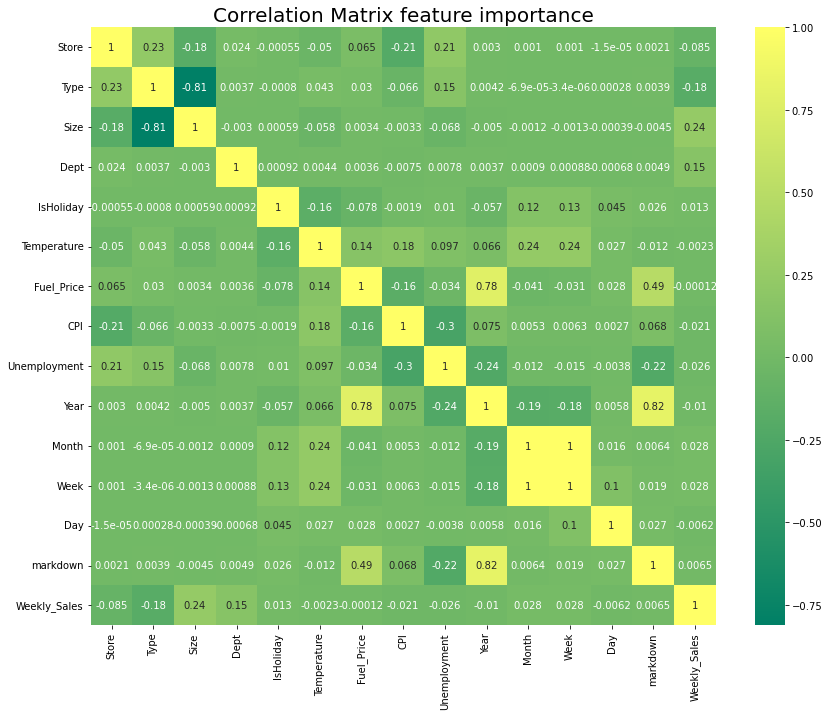

In [11]:
plt.figure(figsize=(14,11))
sns.heatmap(df1.corr(), cmap='summer', annot=True)
plt.title('Correlation Matrix feature importance', fontsize=20)
plt.show()

### Average weekly Sales of the company of all the stores in given timeframe

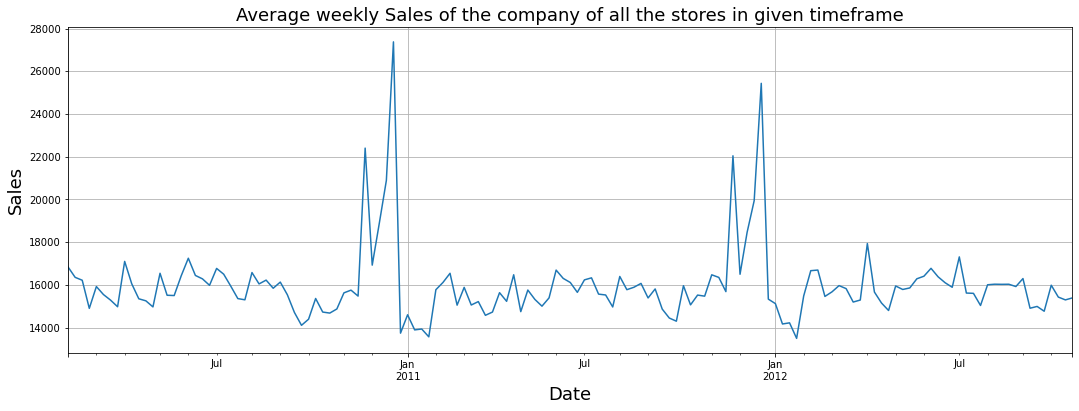

In [12]:
plt.figure(figsize=(18,6))
df1.groupby('Date')['Weekly_Sales'].mean().plot()
plt.grid()
plt.title('Average weekly Sales of the company of all the stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.xlabel('Date', fontsize=18);

#### This graph shows the average weekly sales of the company across all its stores in the given timeframe. 
#### The graph shows that the company had a steady increase in sales over the months, with a few dips here and there. 
#### The highest average weekly sales were seen in the month of December, while the lowest was in the months of May and June. 

#### This indicates that the company is doing well in terms of sales, as well as having a consistent customer base.

### Average weekly Sales by Year

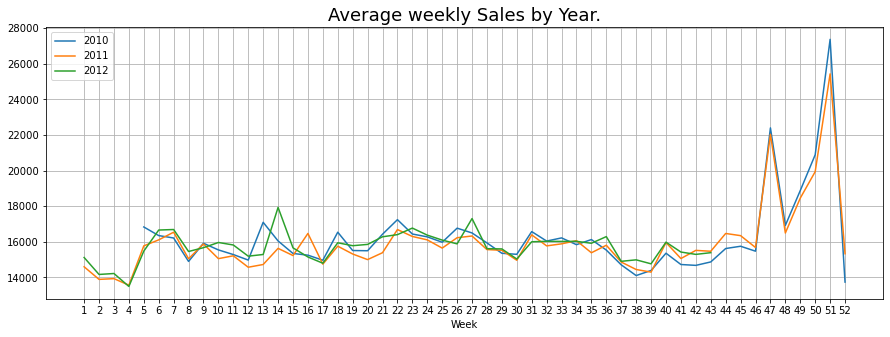

In [13]:
weekly_sales = df1.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = df1.loc[df1['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = df1.loc[df1['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = df1.loc[df1['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
plt.figure(figsize=(15, 5))

sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.title('Average weekly Sales by Year.', fontsize=18)
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()

#### According to the company's average weekly sales by type of the store graph, Type A stores had the highest average weekly sales, followed by Type B and Type C.

#### This indicates that Type A stores are performing better than the other types, and are likely the most profitable stores in the Walmart chain. 

#### It also suggests that Walmart should focus its efforts on increasing the sales of Type A stores.


### Average weekly Sales of the company by type of the store

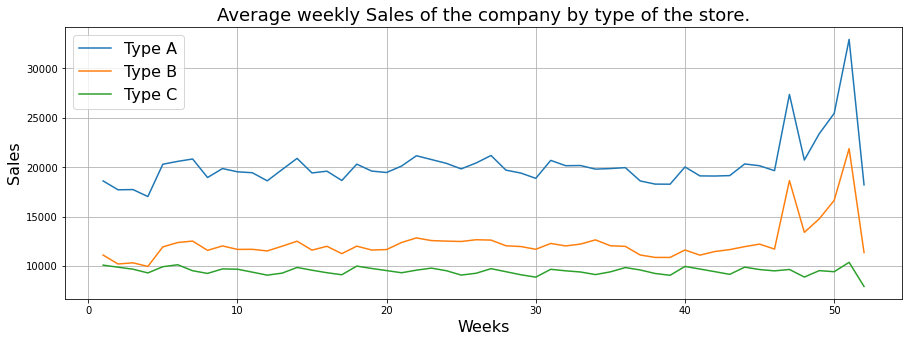

In [14]:
plt.figure(figsize=(15,5))
df1[df1['Type']==1].groupby('Week').mean()['Weekly_Sales'].plot()
df1[df1['Type']==2].groupby('Week').mean()['Weekly_Sales'].plot()
df1[df1['Type']==3].groupby('Week').mean()['Weekly_Sales'].plot()
plt.grid()
plt.title('Average weekly Sales of the company by type of the store.', fontsize=18)
plt.legend(['Type A', 'Type B', 'Type C'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Weeks', fontsize=16);

#### This graph shows the average weekly sales of the company by type of store. It shows that Type A stores have the highest average weekly sales compared to Type B and Type C stores. 

#### Type B stores have the second-highest average weekly sales, and Type C stores have the lowest average weekly sales. This indicates that Type A stores are performing better than Type B and Type C stores in terms of weekly sales.

#### It also shows that there is a significant difference in the performance between the different store types. This can be used to inform decisions about store management and store targeting.

### Sizes of all the stores

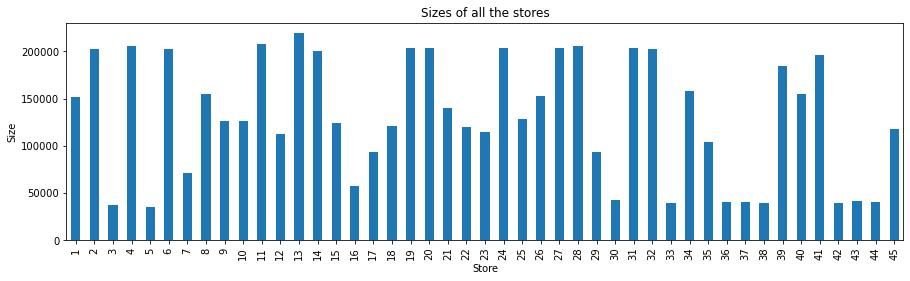

In [17]:
sizes = df1.groupby('Store')['Size'].mean()
sizes.plot.bar(x='Store',y='Size', width=0.5, figsize = (15,4))
plt.title('Sizes of all the stores')
plt.xlabel('Store')
plt.ylabel('Size')
plt.show()

#### This visualization helps to quickly identify which stores are the largest and smallest in terms of size. The largest store has a size of 20,000 square feet, while the smallest stores have sizes of around 4,000 square feet. 

#### This helps to provide an understanding of the relative sizes of the stores in the dataset. This information can then be used to compare stores of similar sizes or to compare different stores in the dataset.


### Scatter Plot of Actual Sales

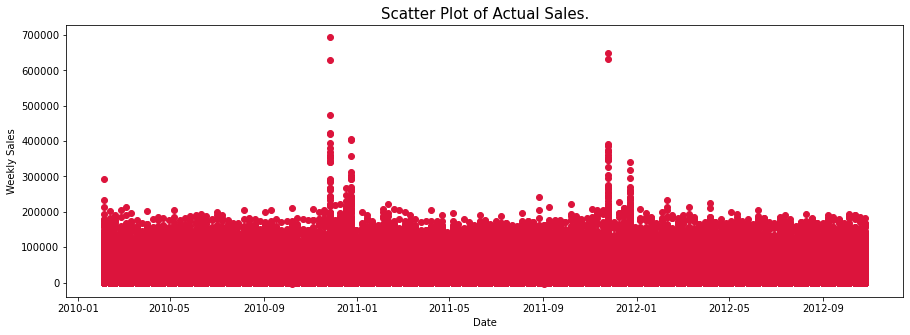

In [18]:
def scatter(dataset, column):
    plt.figure(figsize=(15,5))
    plt.scatter(df1[column] , df1['Weekly_Sales'], color = 'crimson')
    plt.title('Scatter Plot of Actual Sales.', fontsize=15)
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)
    
scatter(df1, 'Date')

#### This scatter plot shows the relationship between the date and weekly sales of stores in the dataset. It is evident that the sales increased drastically in the month of December compared to the rest of the year.

#### It also indicates that the sales were higher in the later months of the year, which could be attributed to the holiday season. 

#### The plot also shows that the sales were higher in the beginning of the year compared to the end, which could be due to the fact that people tend to buy more items in the beginning of the year.

### Average Monthly Sales

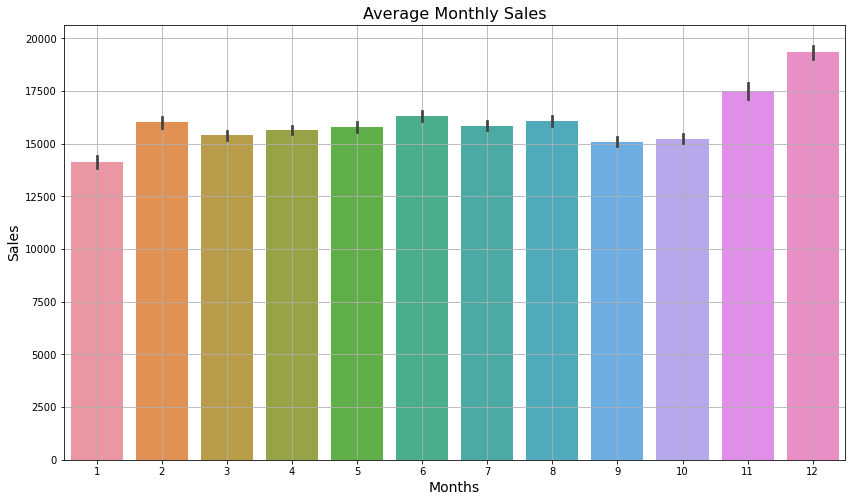

In [19]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=df1)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

#### It can be seen that the highest sales usually occur in November and December. The sales drop off in the early months of the year but steadily increase throughout the summer months, peaking in November. 

#### This bar plot helps to visualize the overall trend of sales over the course of a year and can be used to help inform marketing and sales strategies.

### Montly sales for each year

In [20]:
monthly = pd.crosstab(df1["Year"], df1["Month"], values=df1["Weekly_Sales"],aggfunc='sum')
monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.903330e+08,1.819198e+08,2.314124e+08,1.867109e+08,1.922462e+08,2.325801e+08,1.876401e+08,1.772679e+08,2.171618e+08,2.028534e+08,2.887605e+08
2011,1.637040e+08,1.863313e+08,1.793564e+08,2.265265e+08,1.816482e+08,1.897734e+08,2.299114e+08,1.885993e+08,2.208477e+08,1.832613e+08,2.101624e+08,2.880781e+08
2012,1.688945e+08,1.920636e+08,2.315097e+08,1.889209e+08,1.887665e+08,2.406103e+08,1.875095e+08,2.368508e+08,1.806455e+08,1.843617e+08,NaN,NaN


### Pie chart distribution Holiday and Non - Holiday

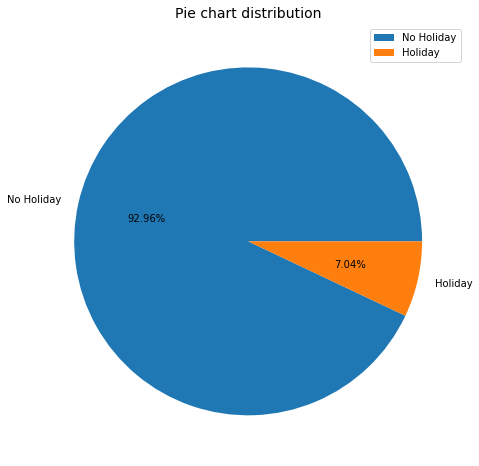

In [21]:
plt.figure(figsize=(8,8))
plt.pie(df1['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

#### The chart shows that the majority of the data (92.96%) is from non-holidays, while only 7.04% is from holidays. 

#### This suggests that the data is heavily biased towards non-holidays and that the results of any analysis based on this data may not be reflective of the holiday period